<a href="https://colab.research.google.com/github/Meghashyamt/python/blob/master/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import librarires 
import numpy as np
import pandas as pd

#import data visuvalize
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


#import train test
from sklearn.model_selection import train_test_split

#import metrics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from scipy import stats

In [0]:
data=pd.read_csv("carevaluation.csv")
data.head()

,Buying,M. Cost,Doors,Persons,Leg Boot,Safety,Outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [0]:
data.shape

(1728, 7)

In [0]:
data.isnull().sum()

Buying      0
M. Cost     0
Doors       0
Persons     0
Leg Boot    0
Safety      0
Outcome     0
dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
enc= LabelEncoder()

In [0]:
data.columns= ['Buying', 'MCost', 'Doors','Persons','LegBoot','Safety', 'Outcome']

In [0]:
data.columns

Index(['Buying', 'MCost', 'Doors', 'Persons', 'LegBoot', 'Safety', 'Outcome'], dtype='object')

In [0]:
data.Buying= enc.fit_transform(data.Buying)
data.MCost= enc.fit_transform(data.MCost)
data.Doors= enc.fit_transform(data.Doors)
data.Persons= enc.fit_transform(data.Persons)
data.LegBoot = enc.fit_transform(data.LegBoot)
data.Safety= enc.fit_transform(data.Safety)
data.Outcome= enc.fit_transform(data.Outcome)

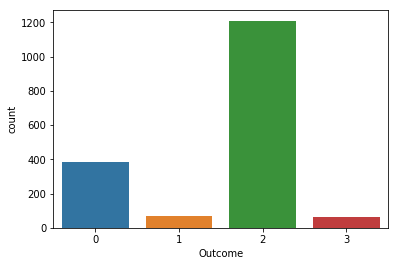

In [0]:
sb.countplot(data.Outcome)

In [0]:
X=data.iloc[:, :6]
y=data.Outcome

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15, random_state=10)

In [0]:
from sklearn.svm import SVC

In [0]:
model= SVC(kernel= 'rbf', C= 1000, gamma =0.1)

In [0]:
model.fit(X_train,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
predict =model.predict(X_test)

In [0]:
y_test

954     2
115     2
1422    2
35      2
1579    1
372     2
859     0
233     0
510     2
1334    0
750     2
130     2
267     2
211     2
427     0
689     0
1622    2
1570    2
69      2
1158    2
1323    2
1277    2
539     2
518     2
1328    2
1085    2
1185    2
1040    0
1680    2
1059    2
       ..
1000    2
1405    2
695     0
881     0
34      2
1308    2
1410    2
1708    2
1688    3
1008    2
903     2
1693    0
573     2
986     0
567     2
1177    0
1521    2
87      2
963     2
217     2
120     2
1016    0
1408    2
359     2
24      2
1102    0
1109    2
784     2
808     0
326     2
Name: Outcome, Length: 260, dtype: int64

In [0]:
predict

array([2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3,
       2, 0, 2, 2, 2, 2, 2, 0, 1, 3, 1, 2, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2,
       0, 0, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 3, 2, 2, 0, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 3, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 3, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2])

In [0]:
accuracy_score(y_test, predict)

1.0

In [0]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00       194
           3       1.00      1.00      1.00        14

   micro avg       1.00      1.00      1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
#Grid Search  to find the value from kernel , c , gamma
parameters=[{'kernel':['linear'], 'C':[1,10,100,1000,10000]},
           {'kernel':['rbf'],'gamma':[0.5, 0.1, 0.05,0.07,0.08], 'C':[1,10,100,1000,10000]}]

In [0]:
grid_model_svc= GridSearchCV(SVC(), parameters)
grid_model_svc.fit(X_train, y_train)
grid_model_svc.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9863760217983651

In [0]:
grid_model_svc.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}